# car price prediction 

### Main objective:
Goal is to predict the price of the car using regression models given multible featureslisted below


### Description of the data set:
Here we use data that studies informations about cars including the following parameters:
1. (Make)>> the manifacture company of the car
2. (Model)>> the model of the car
3. (Year)>> year of manifacture
4. (Engine Fuel Type)
6. (Engine HP) >> Horse Power
7. (Engine Cylinders)>> number of cylinders
8. (Transmission Type)>> Automatic/Manual
9. (Driven_Wheels)>>Front/all
 10. (Number of Doors)
 11. (Market Category)>>crossover/Luxury
 12. (Vehicle Size)
 13. (Vehicle Style)
 14. (highway MPG)
 15. (city mpg)
 16. (Popularity)
 17. (MSRP)>> Manufacturer's Suggested [Retail Price]>> Our Target



### Plan for data exploration:
1. cleaning data 
    * removing unimportant data 
    * dealing with missing (NaN) values if found.
2. feature engineering 
    * visualizing the data and see the data distribution 
    * deal with skewed distribution if found
3. Variable Selection
    * encoding for categorical variables
    * feature scalling for continuous variables


In [1]:
# importing
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline

### 1. cleaning data 


In [2]:
df = pd.read_csv("data/data.csv")
df.head(3).T

,0,1,2
Make,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series
Year,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0
Engine Cylinders,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance"


In [3]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = df.dtypes[df.dtypes == 'object'].index
for col in string_columns:
 df[col] = df[col].str.lower().str.replace(' ', '_')

In [5]:
df.head(3).T

,0,1,2
make,bmw,bmw,bmw
model,1_series_m,1_series,1_series
year,2011,2011,2011
engine_fuel_type,premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required)
engine_hp,335.0,300.0,300.0
engine_cylinders,6.0,6.0,6.0
transmission_type,manual,manual,manual
driven_wheels,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive
number_of_doors,2.0,2.0,2.0
market_category,"factory_tuner,luxury,high-performance","luxury,performance","luxury,high-performance"


In [6]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [7]:
df = df.fillna(0)

In [8]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [21]:
df['model'].values.is_unique()

AttributeError: 'numpy.ndarray' object has no attribute 'is_unique'

In [11]:
df=df.drop(columns='model')
df.head()

,make,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### 2. feature engineering

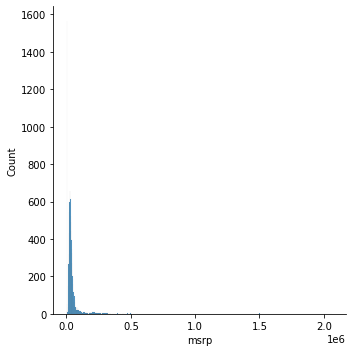

In [12]:
sns.displot(df.msrp) 

data is positive skewed

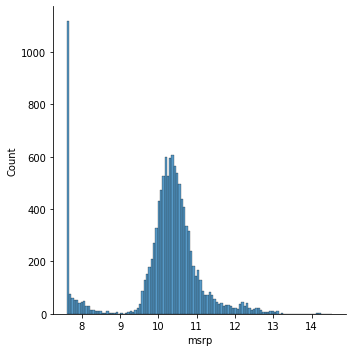

In [13]:
sns.displot(np.log1p(df.msrp)) 

### 3. Variable Selection


In [14]:
#One-hot encoding for dummy variables
string_columns = df.dtypes[df.dtypes == 'object'].index.to_list()
df[string_columns].T

,0,1,2,3,4,5,6,7,8,9,...,11904,11905,11906,11907,11908,11909,11910,11911,11912,11913
make,bmw,bmw,bmw,bmw,bmw,bmw,bmw,bmw,bmw,bmw,...,bmw,bmw,acura,acura,acura,acura,acura,acura,acura,lincoln
engine_fuel_type,premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),...,premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(required),premium_unleaded_(recommended),regular_unleaded
transmission_type,manual,manual,manual,manual,manual,manual,manual,manual,manual,manual,...,manual,manual,automatic,automatic,automatic,automatic,automatic,automatic,automatic,automatic
driven_wheels,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,rear_wheel_drive,...,rear_wheel_drive,rear_wheel_drive,all_wheel_drive,all_wheel_drive,all_wheel_drive,all_wheel_drive,all_wheel_drive,all_wheel_drive,all_wheel_drive,front_wheel_drive
market_category,"factory_tuner,luxury,high-performance","luxury,performance","luxury,high-performance","luxury,performance",luxury,"luxury,performance","luxury,performance","luxury,high-performance",luxury,luxury,...,"exotic,luxury,high-performance","exotic,luxury,high-performance","crossover,hatchback,luxury","crossover,hatchback,luxury","crossover,hatchback,luxury","crossover,hatchback,luxury","crossover,hatchback,luxury","crossover,hatchback,luxury","crossover,hatchback,luxury",luxury
vehicle_size,compact,compact,compact,compact,compact,compact,compact,compact,compact,compact,...,compact,compact,midsize,midsize,midsize,midsize,midsize,midsize,midsize,midsize
vehicle_style,coupe,convertible,coupe,coupe,convertible,coupe,convertible,coupe,convertible,convertible,...,convertible,convertible,4dr_hatchback,4dr_hatchback,4dr_hatchback,4dr_hatchback,4dr_hatchback,4dr_hatchback,4dr_hatchback,sedan


In [15]:
df = pd.get_dummies(df,columns=string_columns,drop_first=True)  
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp,make_alfa_romeo,make_aston_martin,...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04,11914.000000,11914.000000,...,11914.00000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000
mean,2010.384338,247.941749,5.614655,3.434363,26.637485,19.733255,1554.911197,4.059474e+04,0.000420,0.007806,...,0.06656,0.002434,0.101645,0.057160,0.052291,0.035001,0.010744,0.032902,0.255833,0.049689
std,7.579740,110.507669,1.800554,0.884460,8.863001,8.987798,1441.855347,6.010910e+04,0.020483,0.088009,...,0.24927,0.049279,0.302194,0.232157,0.222623,0.183790,0.103098,0.178389,0.436347,0.217312
min,1990.000000,0.000000,0.000000,0.000000,12.000000,7.000000,2.000000,2.000000e+03,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,225.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



#### Pair plot of features
Now we have a filtered dataset, we will generate visuals to better understand the target and feature-target relationships

### 3. Hypothesis Testing

A statistical hypothesis is an assumption about a population parameter. This assumption may or may not be true. Hypothesis testing refers to the formal procedures used by statisticians to accept or reject statistical hypotheses.

In [16]:
%pylab inline
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
from scipy import stats 
import math

Populating the interactive namespace from numpy and matplotlib


#### Null hypothesis.
The null hypothesis, denoted by Ho, is usually the hypothesis that sample observations result purely from chance.

Hypothesis Tests
Statisticians follow a formal process to determine whether to reject a null hypothesis, based on sample data. This process, called hypothesis testing, consists of four steps:

    * State the hypotheses: This involves stating the null and alternative hypotheses. The hypotheses are stated in such a way that they are mutually   exclusive. That is, if one is true, the other must be false.
    * Formulate an analysis plan: The analysis plan describes how to use sample data to evaluate the null hypothesis. The evaluation often focuses around a single test statistic.
    * Analyze sample data: Find the value of the test statistic (mean score, proportion, t statistic, z-score, etc.) described in the analysis plan.
    * Interpret results: Apply the decision rule described in the analysis plan. If the value of the test statistic is unlikely, based on the null     hypothesis, reject the null hypothesis.

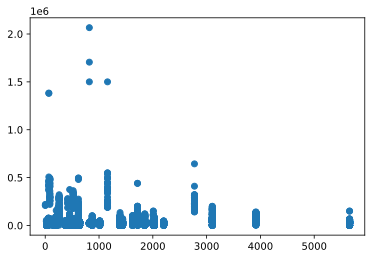

In [17]:
plt.plot(df.popularity,df.msrp,ls=" ",marker="o") 

(array([[0.000e+00, 1.279e+03, 3.950e+02, 6.665e+03, 2.934e+03, 4.160e+02,
         1.880e+02, 3.100e+01, 0.000e+00, 6.000e+00],
        [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]]),
 array([ 0.21371783, 10.19116403, 20.16861023, 30.14605643, 40.12350263,
        50.10094883, 60.07839502, 70.05584122, 80.03328742, 90.01073362,
        99.98817982]),
 <a list of 2 BarContainer objects>)

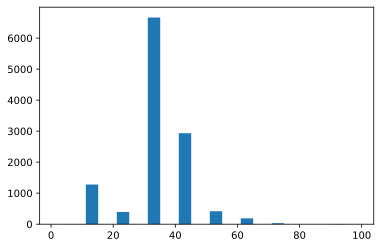

In [26]:
from scipy.stats import boxcox
plt.hist(boxcox(df.msrp))

(array([1.573e+03, 6.600e+01, 3.530e+02, 4.659e+03, 4.036e+03, 7.390e+02,
        3.360e+02, 1.420e+02, 4.000e+00, 6.000e+00]),
 array([ 7.60140233,  8.2953699 ,  8.98933746,  9.68330503, 10.37727259,
        11.07124016, 11.76520772, 12.45917528, 13.15314285, 13.84711041,
        14.54107798]),
 <BarContainer object of 10 artists>)

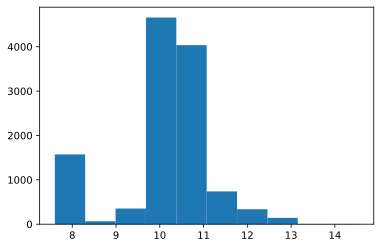

In [30]:
plt.hist(np.log1p(df.msrp))

In [29]:
from scipy.stats.mstats import normaltest
normaltest(np.log1p(df.msrp))

NormaltestResult(statistic=1505.2979231995191, pvalue=0.0)

The p value is 0 which is smaller than 0.05. Therefore we reject the null hypothesis at 5% significance level, meaning that the popularity increase is not the same as in msrp increase.

### Next Steps

trying to get more features using the year column with other features